In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("Dataset .csv")
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [15]:
df = df.dropna()

In [16]:
df.shape

(9542, 21)

In [17]:
df = df[df['Aggregate rating'] !=0]

In [18]:
df.shape

(7394, 21)

Histogram Plot


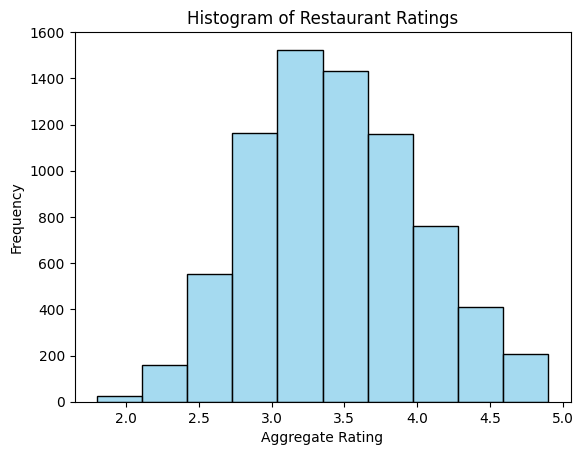

In [19]:
sns.histplot(df['Aggregate rating'], bins=10, color="skyblue")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Restaurant Ratings")
plt.show()

Bar Plot

<ipython-input-23-c6632829dfc7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Aggregate rating'], palette="coolwarm", order=sorted(df['Aggregate rating'].unique()))


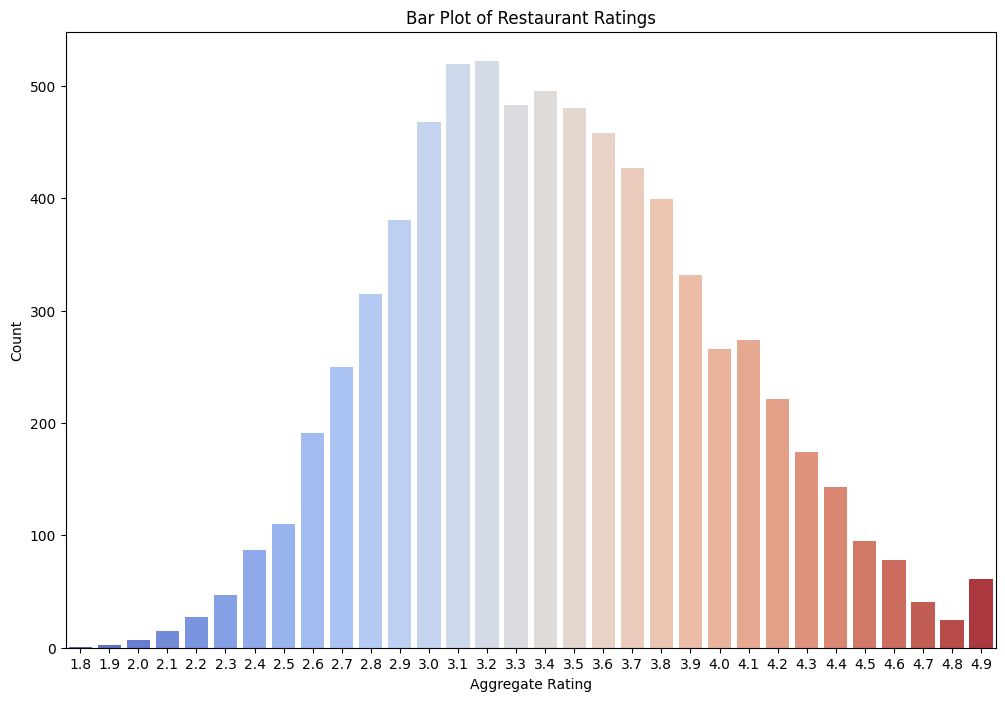

In [23]:
plt.figure(figsize = (12,8))
sns.countplot(x=df['Aggregate rating'], palette="coolwarm", order=sorted(df['Aggregate rating'].unique()))
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Bar Plot of Restaurant Ratings")
plt.show()

Kde plot

<ipython-input-25-c2c4f0e1d8aa>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Aggregate rating'], shade=True, color="blue")


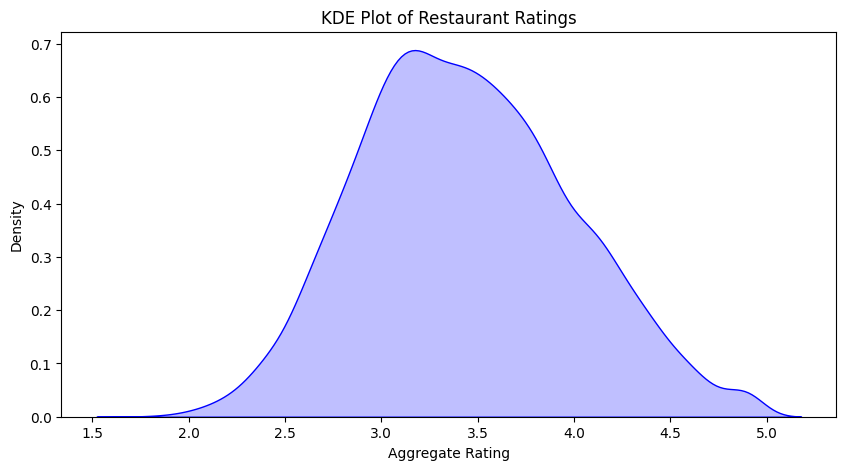

In [25]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Aggregate rating'], shade=True, color="blue")
plt.xlabel("Aggregate Rating")
plt.ylabel("Density")
plt.title("KDE Plot of Restaurant Ratings")
plt.show()


In [26]:
# Consider only the first cuisine type if many cuisines are given
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0] if ',' in str(x) else x)

<ipython-input-28-caea248a2854>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette="coolwarm")


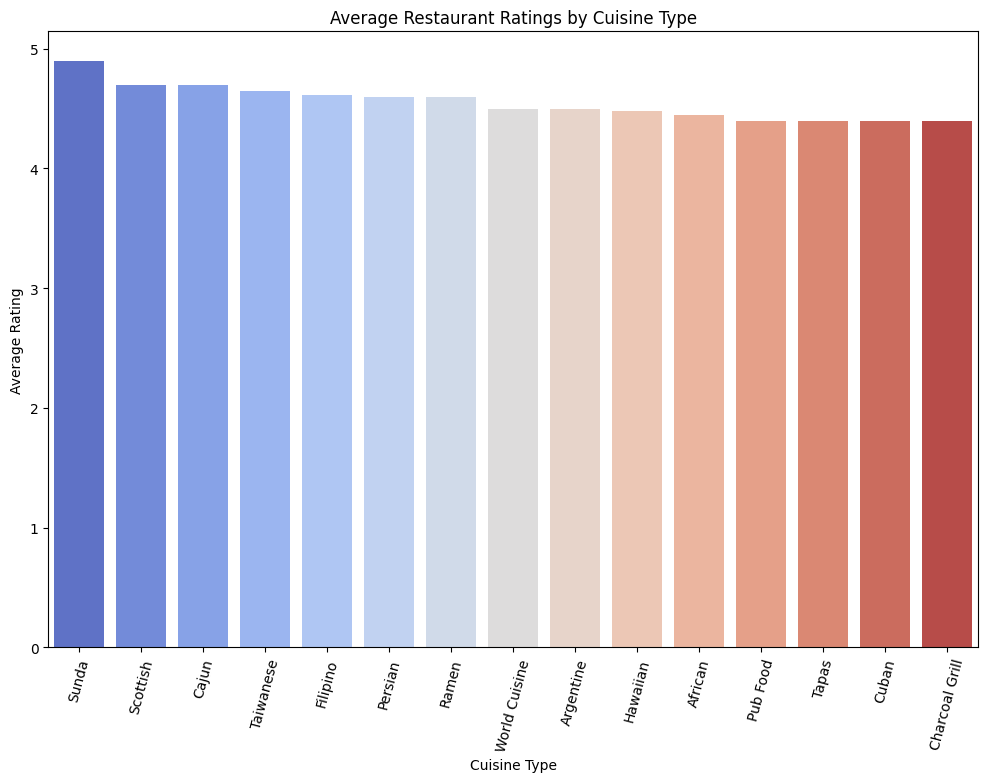

In [28]:
cuisine_ratings = df.groupby("Primary Cuisine")["Aggregate rating"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette="coolwarm")

plt.xticks(rotation=75)
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.title("Average Restaurant Ratings by Cuisine Type")
plt.show()


<ipython-input-32-776a73351131>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="coolwarm")


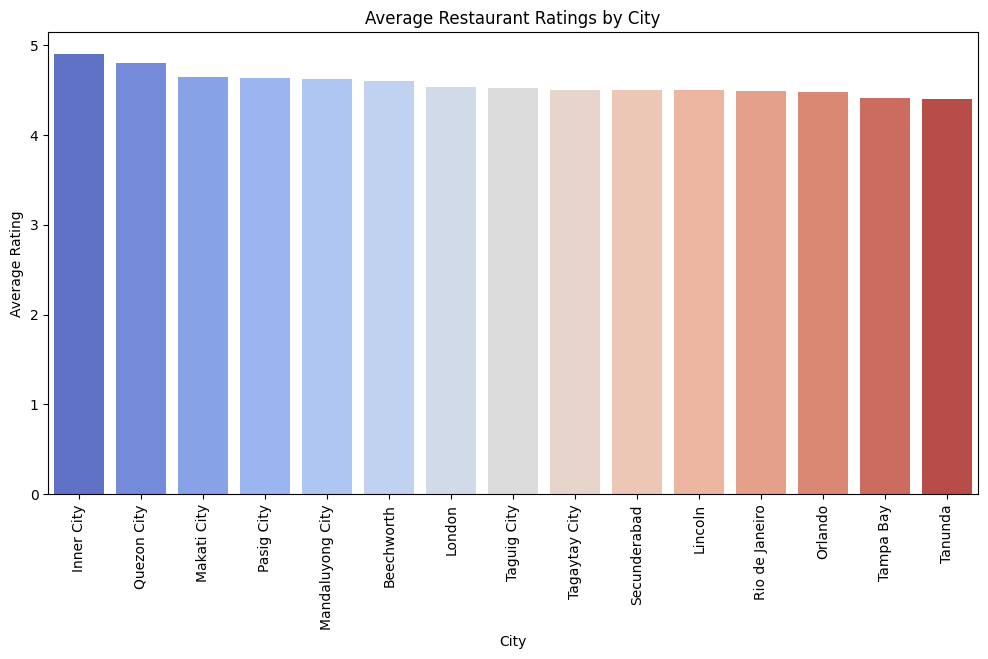

In [32]:
city_ratings = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=city_ratings.index, y=city_ratings.values, palette="coolwarm")
plt.xticks(rotation = 90)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Restaurant Ratings by City")
plt.show()

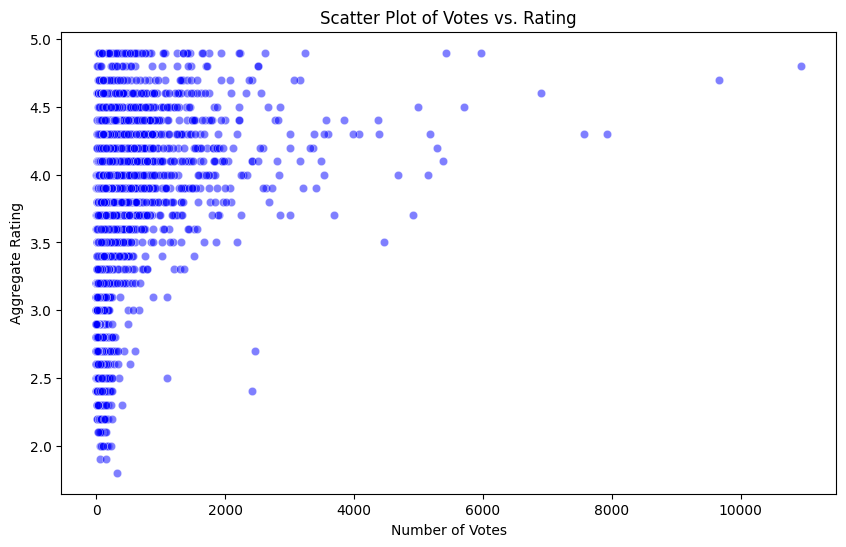

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], alpha=0.5, color="blue")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Scatter Plot of Votes vs. Rating")
plt.show()

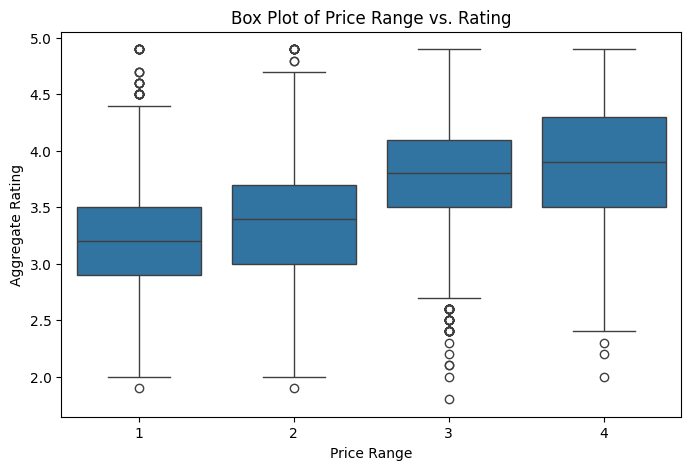

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price range'], y=df['Aggregate rating'])
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Box Plot of Price Range vs. Rating")
plt.show()